In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib import colors

In [136]:
# Matrix of original cell mutation data
original_data = np.array([
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0],
    [0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0],
    [0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0],
    [0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0],
    [0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0],
    [0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0],
    [0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0],
    [0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0],
    [0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0],
    [0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
    [0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
    [0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1]
])

print(original_data.shape)

(23, 42)


In [142]:
# Transpose to swap rows and columns
transposed_data = np.transpose(original_data.copy())
# Sort by new rows in reverse order, i.e. the columns of the original data
col_sorted_data = transposed_data[np.argsort([-1 * np.count_nonzero(col) for col in transposed_data],
                                             kind = "stable")]

# Assign different numbers per mutation
col_sorted_data[10:11] *= 2
col_sorted_data[11:17] *= 3
col_sorted_data[17:28] *= 4
col_sorted_data[28:34] *= 5
col_sorted_data[34:38] *= 6
col_sorted_data[38:42] *= 7

# Transpose again to switch rows back to columns
col_sorted_data = np.transpose(col_sorted_data)

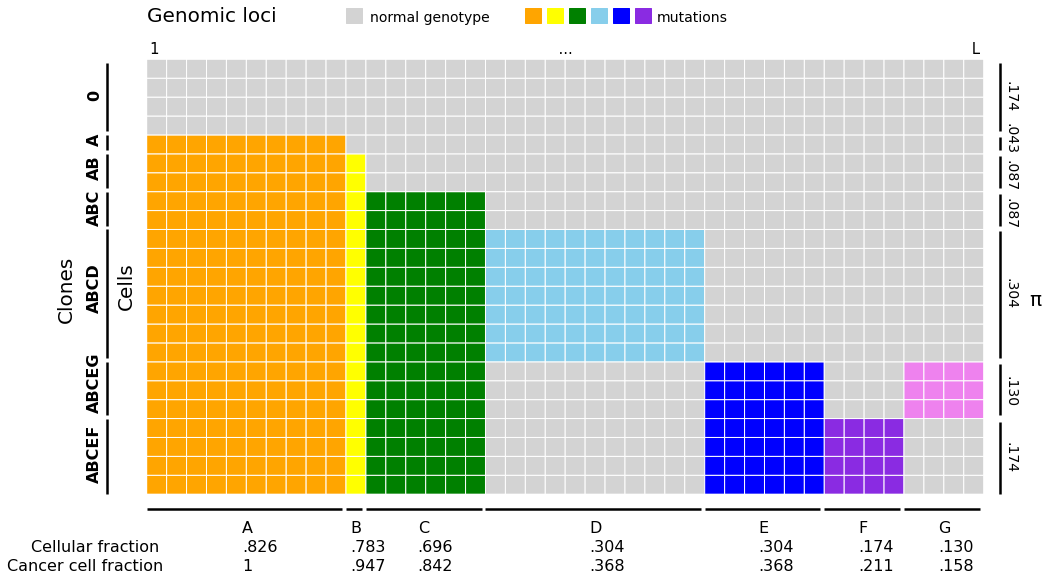

In [152]:
### Matrix plot ###

mutation_colours = ['lightgrey', 'orange', 'yellow', 'green', 'skyblue', 'blue',
                    'blueviolet', 'violet']

# Create matrix plot and add data
plt.figure(figsize = (15, 8))
plt.pcolor(col_sorted_data[::-1], cmap = colors.ListedColormap(mutation_colours),
           edgecolors = 'white', linewidths = 1)

# Hide plot edge and axes
plt.box(False)
plt.axis('off')

# Set title and axis labels
plt.title("1" + " " * 84 + "..." + " " * 84 + "L", fontsize = 15)
plt.text(0, 25, "Genomic loci", fontsize = 20)
plt.text(-1.5, 10, "Cells", fontsize = 20, rotation = 90)
plt.text(-4.5, 9.3, "Clones", fontsize = 20, rotation = 90)
plt.text(44.3, 10, "π", fontsize = 20)

# Add legend
plt.gca().add_patch(patches.Rectangle((10, 24.9), 0.8, 0.8, fill = True,
                                      color = mutation_colours[0], clip_on = False,
                                      linewidth = 1))
plt.gca().add_patch(patches.Rectangle((19, 24.9), 0.8, 0.8, fill = True,
                                      color = mutation_colours[1], clip_on = False,
                                      linewidth = 1))
plt.gca().add_patch(patches.Rectangle((20.1, 24.9), 0.8, 0.8, fill = True,
                                      color = mutation_colours[2], clip_on = False,
                                      linewidth = 1))
plt.gca().add_patch(patches.Rectangle((21.2, 24.9), 0.8, 0.8, fill = True,
                                      color = mutation_colours[3], clip_on = False,
                                      linewidth = 1))
plt.gca().add_patch(patches.Rectangle((22.3, 24.9), 0.8, 0.8, fill = True,
                                      color = mutation_colours[4], clip_on = False,
                                      linewidth = 1))
plt.gca().add_patch(patches.Rectangle((23.4, 24.9), 0.8, 0.8, fill = True,
                                      color = mutation_colours[5], clip_on = False,
                                      linewidth = 1))
plt.gca().add_patch(patches.Rectangle((24.5, 24.9), 0.8, 0.8, fill = True,
                                      color = mutation_colours[6], clip_on = False,
                                      linewidth = 1))
plt.text(11.2, 25, "normal genotype", fontsize = 14)
plt.text(25.6, 25, "mutations", fontsize = 14)

# Add left lines and annotations
plt.gca().add_patch(patches.Rectangle((-2, 19.2), 0.005, 3.6, fill = True,
                                      color = "black", clip_on = False,
                                      linewidth = 2.5))
plt.gca().add_patch(patches.Rectangle((-2, 18.2), 0.005, 0.8, fill = True,
                                      color = "black", clip_on = False,
                                      linewidth = 2.5))
plt.gca().add_patch(patches.Rectangle((-2, 16.2), 0.005, 1.8, fill = True,
                                      color = "black", clip_on = False,
                                      linewidth = 2.5))
plt.gca().add_patch(patches.Rectangle((-2, 14.2), 0.005, 1.8, fill = True,
                                      color = "black", clip_on = False,
                                      linewidth = 2.5))
plt.gca().add_patch(patches.Rectangle((-2, 7.2), 0.005, 6.8, fill = True,
                                      color = "black", clip_on = False,
                                      linewidth = 2.5))
plt.gca().add_patch(patches.Rectangle((-2, 4.2), 0.005, 2.8, fill = True,
                                      color = "black", clip_on = False,
                                      linewidth = 2.5))
plt.gca().add_patch(patches.Rectangle((-2, 0), 0.005, 4, fill = True,
                                      color = "black", clip_on = False,
                                      linewidth = 2.5))

plt.text(-3, 21, "0", fontsize = 16, rotation = 90, fontweight = 'bold')
plt.text(-3, 18.6, "A", fontsize = 16, rotation = 90, fontweight = 'bold')
plt.text(-3, 16.8, "AB", fontsize = 16, rotation = 90, fontweight = 'bold')
plt.text(-3, 14.4, "ABC", fontsize = 16, rotation = 90, fontweight = 'bold')
plt.text(-3, 9.8, "ABCD", fontsize = 16, rotation = 90, fontweight = 'bold')
plt.text(-3, 4.5, "ABCEG", fontsize = 16, rotation = 90, fontweight = 'bold')
plt.text(-3, 0.8, "ABCEF", fontsize = 16, rotation = 90, fontweight = 'bold')

# Add right lines and annotations
plt.gca().add_patch(patches.Rectangle((42.8, 19.2), 0.005, 3.6, fill = True,
                                      color = "black", clip_on = False,
                                      linewidth = 2.5))
plt.gca().add_patch(patches.Rectangle((42.8, 18.2), 0.005, 0.7, fill = True,
                                      color = "black", clip_on = False,
                                      linewidth = 2.5))
plt.gca().add_patch(patches.Rectangle((42.8, 16.2), 0.005, 1.7, fill = True,
                                      color = "black", clip_on = False,
                                      linewidth = 2.5))
plt.gca().add_patch(patches.Rectangle((42.8, 14.2), 0.005, 1.7, fill = True,
                                      color = "black", clip_on = False,
                                      linewidth = 2.5))
plt.gca().add_patch(patches.Rectangle((42.8, 7.2), 0.005, 6.7, fill = True,
                                      color = "black", clip_on = False,
                                      linewidth = 2.5))
plt.gca().add_patch(patches.Rectangle((42.8, 4.2), 0.005, 2.7, fill = True,
                                      color = "black", clip_on = False,
                                      linewidth = 2.5))
plt.gca().add_patch(patches.Rectangle((42.8, 0), 0.005, 3.8, fill = True,
                                      color = "black", clip_on = False,
                                      linewidth = 2.5))

plt.text(43, 20.4, ".174", fontsize = 14, rotation = 270)
plt.text(43, 18.2, ".043", fontsize = 14, rotation = 270)
plt.text(43, 16.2, ".087", fontsize = 14, rotation = 270)
plt.text(43, 14.2, ".087", fontsize = 14, rotation = 270)
plt.text(43, 10, ".304", fontsize = 14, rotation = 270)
plt.text(43, 4.8, ".130", fontsize = 14, rotation = 270)
plt.text(43, 1.3, ".174", fontsize = 14, rotation = 270)

# Add lower lines and annotations
plt.gca().add_patch(patches.Rectangle((0, -0.8), 9.8, 0.005, fill = True,
                                      color = "black", clip_on = False,
                                      linewidth = 2.5))
plt.gca().add_patch(patches.Rectangle((10, -0.8), 0.8, 0.005, fill = True,
                                      color = "black", clip_on = False,
                                      linewidth = 2.5))
plt.gca().add_patch(patches.Rectangle((11, -0.8), 5.8, 0.005, fill = True,
                                      color = "black", clip_on = False,
                                      linewidth = 2.5))
plt.gca().add_patch(patches.Rectangle((17, -0.8), 10.8, 0.005, fill = True,
                                      color = "black", clip_on = False,
                                      linewidth = 2.5))
plt.gca().add_patch(patches.Rectangle((28, -0.8), 5.8, 0.005, fill = True,
                                      color = "black", clip_on = False,
                                      linewidth = 2.5))
plt.gca().add_patch(patches.Rectangle((34, -0.8), 3.8, 0.005, fill = True,
                                      color = "black", clip_on = False,
                                      linewidth = 2.5))
plt.gca().add_patch(patches.Rectangle((38, -0.8), 3.8, 0.005, fill = True,
                                      color = "black", clip_on = False,
                                      linewidth = 2.5))

plt.text(4.8, -2, "A", fontsize = 16)
plt.text(4.8, -3, ".826", fontsize = 16)
plt.text(4.8, -4, "1", fontsize = 16)

plt.text(10.2, -2, "B", fontsize = 16)
plt.text(10.2, -3, ".783", fontsize = 16)
plt.text(10.2, -4, ".947", fontsize = 16)

plt.text(13.6, -2, "C", fontsize = 16)
plt.text(13.6, -3, ".696", fontsize = 16)
plt.text(13.6, -4, ".842", fontsize = 16)

plt.text(22.2, -2, "D", fontsize = 16)
plt.text(22.2, -3, ".304", fontsize = 16)
plt.text(22.2, -4, ".368", fontsize = 16)

plt.text(30.7, -2, "E", fontsize = 16)
plt.text(30.7, -3, ".304", fontsize = 16)
plt.text(30.7, -4, ".368", fontsize = 16)

plt.text(35.7, -2, "F", fontsize = 16)
plt.text(35.7, -3, ".174", fontsize = 16)
plt.text(35.7, -4, ".211", fontsize = 16)

plt.text(39.7, -2, "G", fontsize = 16)
plt.text(39.7, -3, ".130", fontsize = 16)
plt.text(39.7, -4, ".158", fontsize = 16)

plt.text(-5.8, -3, "Cellular fraction", fontsize = 16)
plt.text(-7, -4, "Cancer cell fraction", fontsize = 16)

plt.show()

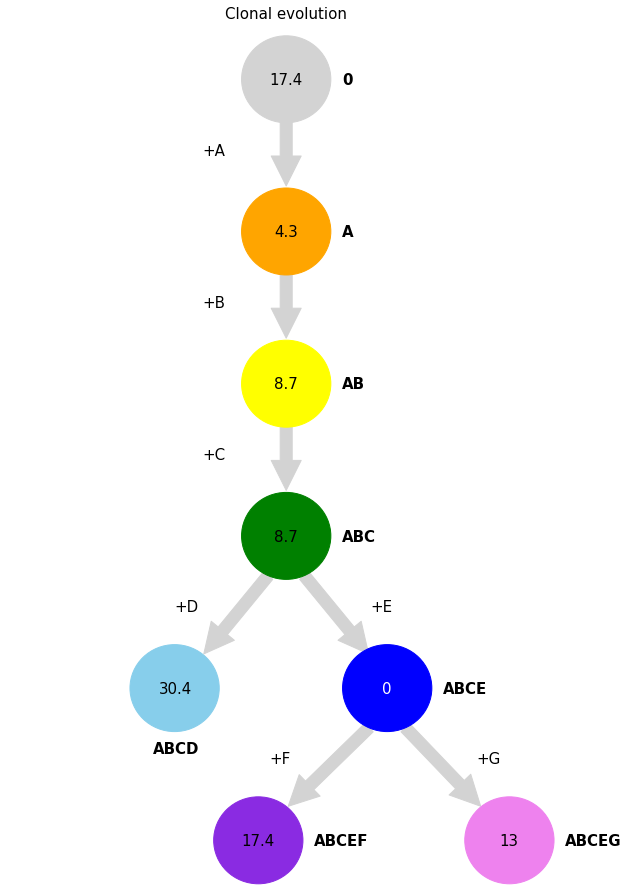

In [131]:
fig, ax = plt.subplots(figsize = (10, 10))

# Add plot title
plt.title("Clonal evolution", fontsize = 15)

# Hide plot edge and axes
plt.box(False)
plt.axis('off')

# Add circles, arrows and annotations
plt.text(0.6, 0.89, "0", fontsize = 15, fontweight = "bold")
plt.text(0.47, 0.89, "17.4", fontsize = 15)
ax.add_patch(patches.FancyArrowPatch((0.5, 0.85), (0.5, 0.7),
                                 mutation_scale = 60, color = "lightgrey"))
ax.add_patch(plt.Circle((0.5, 0.9), 0.08, color = mutation_colours[0],
                        clip_on = False))

# A
plt.text(0.35, 0.76, "+A", fontsize = 15)
plt.text(0.6, 0.61, "A", fontsize = 15, fontweight = "bold")
plt.text(0.478, 0.61, "4.3", fontsize = 15)
ax.add_patch(patches.FancyArrowPatch((0.5, 0.55), (0.5, 0.42),
                                 mutation_scale = 60, color = "lightgrey"))
ax.add_patch(plt.Circle((0.5, 0.62), 0.08, color = mutation_colours[1],
                        clip_on = False))

# AB
plt.text(0.35, 0.48, "+B", fontsize = 15)
plt.text(0.6, 0.33, "AB", fontsize = 15, fontweight = "bold")
plt.text(0.478, 0.33, "8.7", fontsize = 15)
ax.add_patch(patches.FancyArrowPatch((0.5, 0.27), (0.5, 0.14),
                                 mutation_scale = 60, color = "lightgrey"))
ax.add_patch(plt.Circle((0.5, 0.34), 0.08, color = mutation_colours[2],
                        clip_on = False))

# ABC
plt.text(0.35, 0.2, "+C", fontsize = 15)
plt.text(0.6, 0.05, "ABC", fontsize = 15, fontweight = "bold")
plt.text(0.478, 0.05, "8.7", fontsize = 15)
ax.add_patch(patches.FancyArrowPatch((0.47, -0.01), (0.35, -0.16), clip_on = False,
                                 mutation_scale = 60, color = "lightgrey"))
ax.add_patch(patches.FancyArrowPatch((0.53, -0.01), (0.65, -0.16), clip_on = False,
                                 mutation_scale = 60, color = "lightgrey"))
ax.add_patch(plt.Circle((0.5, 0.06), 0.08, color = mutation_colours[3],
                        clip_on = False))

# ABCD
plt.text(0.3, -0.08, "+D", fontsize = 15)
plt.text(0.262, -0.34, "ABCD", fontsize = 15, fontweight = "bold")
plt.text(0.271, -0.23, "30.4", fontsize = 15)
ax.add_patch(plt.Circle((0.3, -0.22), 0.08, color = mutation_colours[4],
                        clip_on = False))

# ABCE
plt.text(0.65, -0.08, "+E", fontsize = 15)
plt.text(0.78, -0.23, "ABCE", fontsize = 15, fontweight = "bold")
plt.text(0.671, -0.23, "0", fontsize = 15, color = "white")
ax.add_patch(patches.FancyArrowPatch((0.651, -0.29), (0.501, -0.44), clip_on = False,
                                 mutation_scale = 60, color = "lightgrey"))
ax.add_patch(patches.FancyArrowPatch((0.711, -0.29), (0.851, -0.44), clip_on = False,
                                 mutation_scale = 60, color = "lightgrey"))
ax.add_patch(plt.Circle((0.681, -0.22), 0.08, color = mutation_colours[5],
                        clip_on = False))

# ABCEF
plt.text(0.47, -0.36, "+F", fontsize = 15)
plt.text(0.55, -0.51, "ABCEF", fontsize = 15, fontweight = "bold")
plt.text(0.42, -0.51, "17.4", fontsize = 15)
ax.add_patch(plt.Circle((0.45, -0.5), 0.08, color = mutation_colours[6],
                        clip_on = False))

# ABCEG
plt.text(0.84, -0.36, "+G", fontsize = 15)
plt.text(1, -0.51, "ABCEG", fontsize = 15, fontweight = "bold")
plt.text(0.882, -0.51, "13", fontsize = 15)
ax.add_patch(plt.Circle((0.9, -0.5), 0.08, color = mutation_colours[7],
                        clip_on = False))

plt.show()

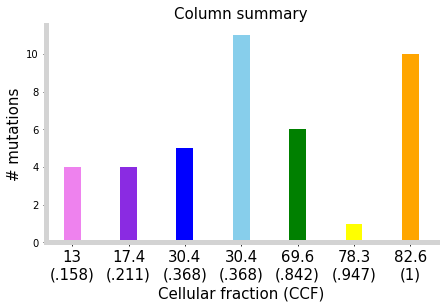

In [56]:
### Column summary plot ###

fig, ax = plt.subplots(figsize = (7, 4))

# Set axes border
ax.spines["left"].set_linewidth(5)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_linewidth(5)

for spine in ax.spines.values():
    spine.set_edgecolor('lightgrey')

# Set data to plot
height = [4, 4, 5, 11, 6, 1, 10]
labels = ["13\n(.158)", "17.4\n(.211)", "30.4\n(.368)", "30.4\n(.368)",
          "69.6\n(.842)", "78.3\n(.947)", "82.6\n(1)"]
ticks = np.arange(len(labels))

# Create bars
plt.bar(ticks, height, color = mutation_colours[::-1], width = 0.3)

# Set axis names and annotation
plt.xticks(ticks = ticks, labels = labels, fontsize = 15)

plt.xlabel("Cellular fraction (CCF)", fontsize = 15)
plt.ylabel("# mutations", fontsize = 15)

# Add plot title
plt.title("Column summary", fontsize = 15)

plt.show()

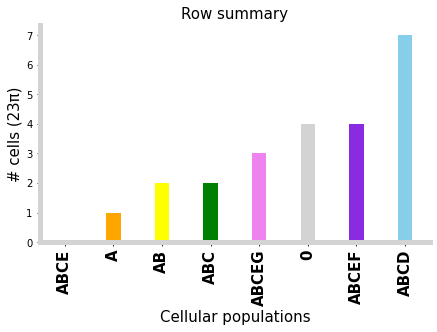

In [57]:
### Row summary plot ###

fig, ax = plt.subplots(figsize = (7, 4))

# Set axes border
ax.spines["left"].set_linewidth(5)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_linewidth(5)

for spine in ax.spines.values():
    spine.set_edgecolor('lightgrey')

# Set data to plot
height = [0, 1, 2, 2, 3, 4, 4, 7]
labels = ['ABCE', 'A', 'AB', 'ABC', 'ABCEG', '0', 'ABCEF', 'ABCD']
ticks = np.arange(len(labels))

row_colours = ['blue', 'orange', 'yellow', 'green', 'violet',
               'lightgrey', 'blueviolet', 'skyblue']

# Create bars
plt.bar(ticks, height, color = row_colours, width = 0.3)

# Set axis names and annotation
plt.xticks(ticks = ticks, labels = labels,
           rotation = 90, fontweight = 'bold', fontsize = 15)

plt.xlabel("Cellular populations", fontsize = 15)
plt.ylabel("# cells (23π)", fontsize = 15)

# Add plot title
plt.title("Row summary", fontsize = 15)

plt.show()